In [36]:
#Training the data using Random Forest
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Import Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
# Load preprocessed data
train_df = pd.read_csv("data/processed/train_processed.csv")
val_df = pd.read_csv("data/processed/validation_processed.csv")

In [30]:
# Split into features and target variable
X_train = train_df.drop("Attrition", axis=1)
y_train = train_df["Attrition"]

X_val = val_df.drop("Attrition", axis=1)
y_val = val_df["Attrition"]

In [31]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the validation set
predictions = rf_model.predict(X_val)

# Evaluate the model performance
accuracy = accuracy_score(y_val, predictions)
report = classification_report(y_val, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7484458826534957
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      6124
           1       0.74      0.73      0.73      5619

    accuracy                           0.75     11743
   macro avg       0.75      0.75      0.75     11743
weighted avg       0.75      0.75      0.75     11743



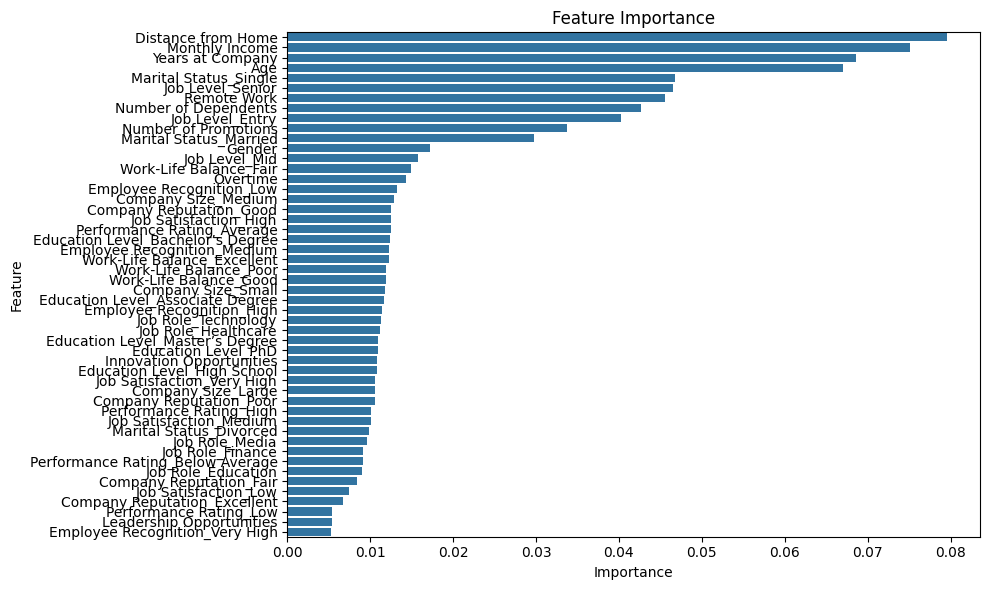

In [ ]:
feature_importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

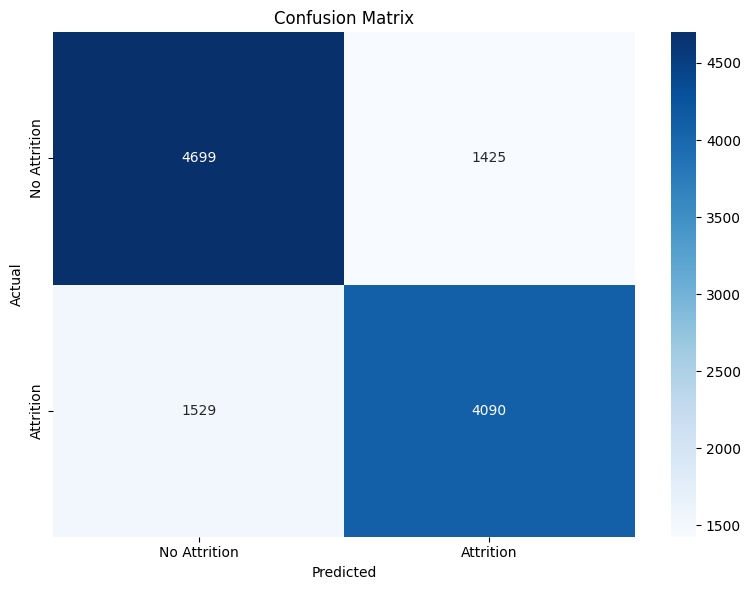

In [37]:
# Generating the confusion matrix
cm = confusion_matrix(y_val, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

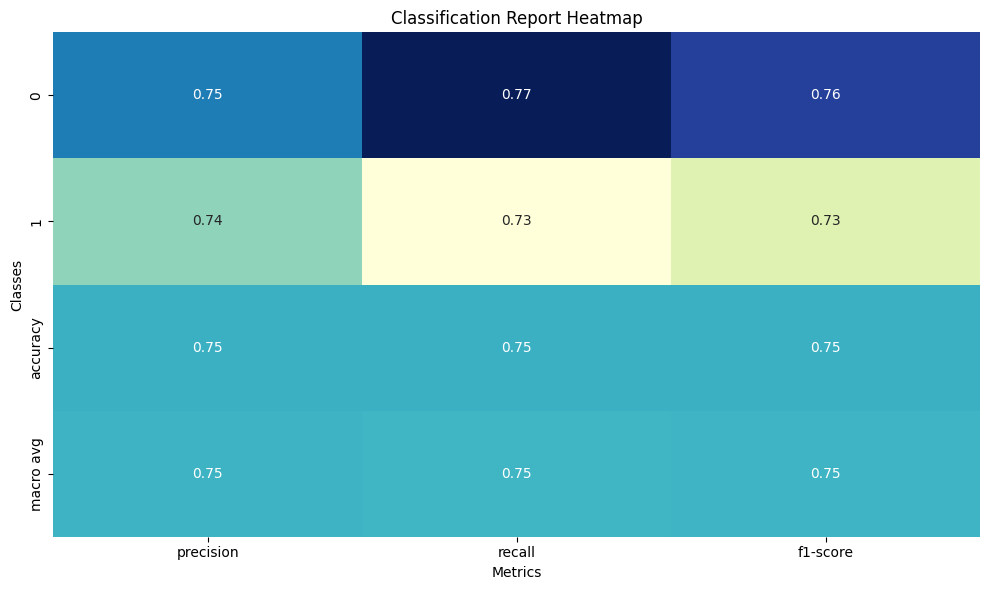

In [ ]:
# Generating the classification report as a dictionary
report_dict = classification_report(y_val, predictions, output_dict=True)
# Convert the classification report into a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", cbar=False)
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()

In [39]:
print('Comparing Predictions vs Actuall Values: (for the first 10 samples)\n')
print("Predictions:  ", " ".join(map(str, predictions[:10])))
print("Actual Values:", " ".join(map(str, y_val.values[:10])))

Comparing Predictions vs Actuall Values: (for the first 10 samples)

Predictions:   1 0 1 1 1 1 1 0 1 0
Actual Values: 1 0 1 1 0 1 1 0 1 0
